# Assignment 3: Classification with Logistic Regression (skim2536, Sung Hyun Kim)

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.

# Code below to display first 5 rows
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [3]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
y = df.TenYearCHD.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5, random_state = 0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** 
Yes. It uses default value of '12' 
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** 
Penalty discourage regression model from becoming too complex and returning exaggerated coefficients. Thus, with penalty, we will observer lower beta coefficients
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** 
No. The built in LogicRegression function in sklearn assumes the column of 1s

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

C:\Users\Boo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Boo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='totChol'>

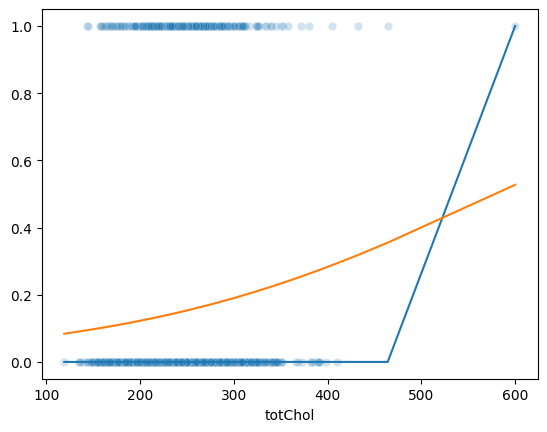

In [4]:
# Question 4 code here.
# YOUR CODE HERE
#print(sklearn.__version__)
FRAMINGHAMLR = LogisticRegression(penalty = None) #i am using scikit-learn version 1.5.2 and it does not recognise 'none' as a valid parameter
framinghamlr = FRAMINGHAMLR.fit(Xtrain[['totChol']],ytrain)
#print(f"Intercept {framinghamlr.intercept_} \nCoefficients: {framinghamlr.coef_}")

# Assign appropriate values to xscater, yscatter (x and y coordinates for scatter plot)
xscatter = Xtest['totChol']
yscatter = ytest
# xline (x coordinates for plot of prediction)
xline = Xtest['totChol']
# yline_label (y coordinates for plot of predicted label)
yline_label = framinghamlr.predict(xline.values.reshape(-1, 1))
# yline_prob (y coordinates for plot of predicted probability)
yline_prob = framinghamlr.predict_proba(xline.values.reshape(-1, 1))[:, 1]


# Plotting code provided
# xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.2) #Plot data
sns.lineplot(x=xline,y=yline_label) # Plot line indicating label
sns.lineplot(x=xline,y=yline_prob) # Plot line indicating probability

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** 
tp + fp = 1 + 0 = 1
(22 test was labeled positive)

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** 
1 extreme outlier of where totChol is 600 and TenYearCHD was 1 is labelled as true positive. This is due to most of the earlier data where totChol is is below 500 are not detectively distributed for the regression model to make correct prediction, thus skewing the regression model to true negative where there are simply more data weights. The only extreme outlier allowed regression model to then jump up, allowing true positive prediction.m

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

**YOUR ANSWER HERE:** 
It is not. The recall and sensitivity value is both very low showing that this regression model just aggresively marks most data as negative, thus while being able to predict many true negatives by chance, it does not visualise the actual regression model that might be useful to detect individuals who will develop CHD. This can be seen on the graph above as well, as all but except extreme true positive case were marked as negatives.

In [5]:
# Calculate performance measures from scratch - provided function
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3), "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
yhat = framinghamlr.classes_[(yline_prob>0.5).astype(int)]
compute_performance(yhat, ytest, framinghamlr.classes_)

## Put code here to compute whatever else you might need to answer the question.




tp: 1 tn: 1538 fp: 0 fn: 289
Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**YOUR ANSWER HERE:**
more associated with CHD

In [6]:
# Code for Question 6
FRAMINGHAMALLLR = LogisticRegression(penalty = None) #i am using scikit-learn version 1.5.2 and it does not recognise 'none' as a valid parameter
framinghamalllr = FRAMINGHAMLR.fit(Xtrain,ytrain)

# Assign appropriate values to xscater, yscatter (x and y coordinates for scatter plot)
# xscatter = Xtest['totChol']
#yscatter = ytest
# xline (x coordinates for plot of prediction)
#xline = Xtest['totChol']
# yline_label (y coordinates for plot of predicted label)
yline_newlabel = framinghamalllr.predict(Xtest)
# yline_prob (y coordinates for plot of predicted probability)
yline_newprob = framinghamalllr.predict_proba(Xtest)[:, 1]

#xaxis = Xtest['age']

C:\Users\Boo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 
tp + fp = 15 + 7 = 22 (22 test instances labeled positive)

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

**YOUR ANSWER:** 
This classifier is better than the first classifier. Recall value mesaures the proportional "recall" value of true positives identified by the classfier, and this classifier clearly have higher recall value (0.052 > 0.003)

In [7]:
# Code for Question 7
#print(yline_newprob)
yhat = framinghamalllr.classes_[(yline_newprob>0.5).astype(int)]
compute_performance(yhat, ytest, framinghamalllr.classes_)

tp: 15 tn: 1531 fp: 7 fn: 275
Accuracy: 0.846 Recall: 0.052 Precision: 0.682 Sensitivity: 0.052 Specificity: 0.995


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** 
Second classifier shows slightly higher AUROC value, showing that it has a higher estimated probability of correct distinguishment (AUROC value of 1 means best performance, and 0 the worst)

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** 
Number of reasons can cause AUROC value below 0.5. For example, issues with data itself or overfitted model (using too much parameters) could cause regression model to skew and capture too much unnecessary noises, outliers or patterns.


Text(0, 0.8, 'AUROC value of: \n0.5730426886686696')

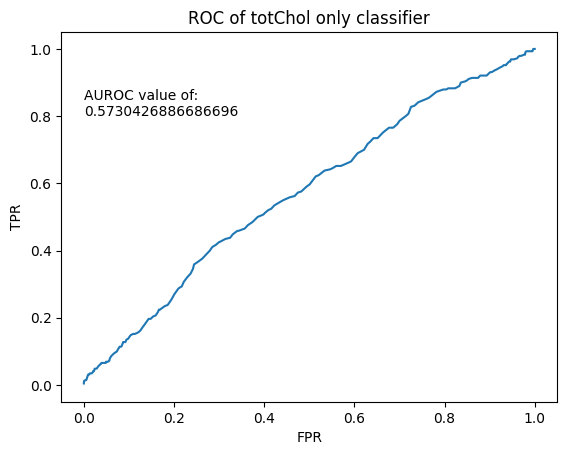

In [8]:
# ROC for totChol-only classifier
fpr, tpr, _ = roc_curve(ytest,yline_prob, pos_label=1 )
ax=sns.lineplot(x=fpr,y=tpr)
plt.title('ROC of totChol only classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0,0.8, 'AUROC value of: \n' + str(auc(fpr,tpr)))

Text(0, 0.8, 'AUROC value of: \n0.6889242634859423')

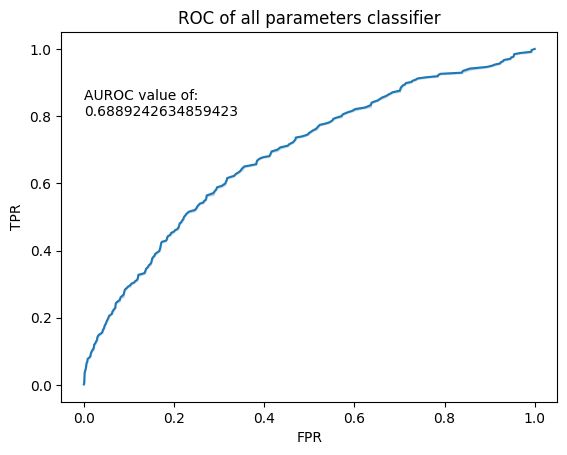

In [9]:
# ROC for all-variable classifier
fpr, tpr, _ = roc_curve(ytest,yline_newprob, pos_label=1 )
ax=sns.lineplot(x=fpr,y=tpr)
plt.title('ROC of all parameters classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0,0.8, 'AUROC value of: \n' + str(auc(fpr,tpr)))

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

**YOUR ANSWER:** *The model with all variables has a precision of about 0.4 at 0.2 recall, and the amount-only classifier has precision almost 0.2 at 0.2 recall, so the model with all variables is preferable.*


Text(0, 0.5, 'Precision')

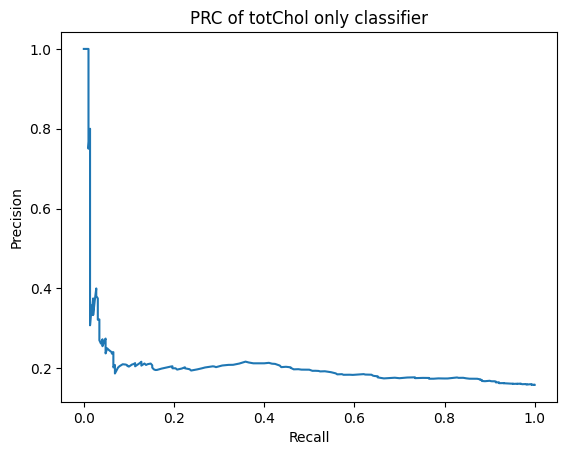

In [10]:
# PRC for totChol-only classifier
precision, recall, _ = precision_recall_curve(ytest, yline_prob, pos_label=1)
plt.plot(recall, precision)
plt.title('PRC of totChol only classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0, 0.5, 'Precision')

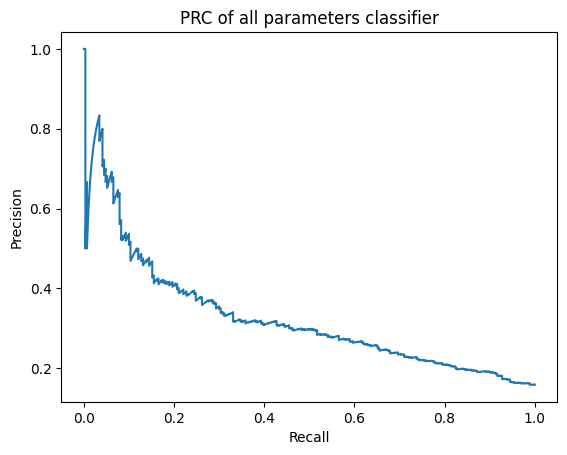

In [11]:
# PRC for all-variable classifier
precision, recall, _ = precision_recall_curve(ytest, yline_newprob, pos_label=1)
plt.plot(recall, precision)
plt.title('PRC of all parameters classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')